# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

# Data Cleaning

In [1]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


dfx = pd.read_excel("season2020-2021Spain.xlsx")
Crowd = dfx['Crowd']
New_Crowd = []
for i in Crowd : 
    New_Crowd.append(0)
dfx["Crowd"] = pd.DataFrame(np.array(New_Crowd))
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         12379 non-null  object 
 1   #              11619 non-null  float64
 2   Nation         11619 non-null  object 
 3   Pos            11619 non-null  object 
 4   Age            11619 non-null  object 
 5   Min            12367 non-null  float64
 6   Gls            12379 non-null  int64  
 7   Ast            12379 non-null  int64  
 8   PK             12379 non-null  int64  
 9   PKatt          12379 non-null  int64  
 10  Sh             12379 non-null  int64  
 11  SoT            12379 non-null  int64  
 12  CrdY           12379 non-null  int64  
 13  CrdR           12379 non-null  int64  
 14  Touches        12367 non-null  float64
 15  Press          12367 non-null  float64
 16  Tkl            12367 non-null  float64
 17  Int            12379 non-null  int64  
 18  Blocks

In [2]:
#Visualizing the DF head (20 first elements)
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [3]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 12377
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11498 non-null  object 
 1   #              11498 non-null  float64
 2   Nation         11498 non-null  object 
 3   Pos            11498 non-null  object 
 4   Age            11498 non-null  object 
 5   Min            11498 non-null  float64
 6   Gls            11498 non-null  int64  
 7   Ast            11498 non-null  int64  
 8   PK             11498 non-null  int64  
 9   PKatt          11498 non-null  int64  
 10  Sh             11498 non-null  int64  
 11  SoT            11498 non-null  int64  
 12  CrdY           11498 non-null  int64  
 13  CrdR           11498 non-null  int64  
 14  Touches        11498 non-null  float64
 15  Press          11498 non-null  float64
 16  Tkl            11498 non-null  float64
 17  Int            11498 non-null  int64  
 18  Blocks

In [5]:
players = pd.read_csv('fifa20-21.csv')

modified_teams =  {
 'Deportivo Alavés': 'Alavés', #Fifa Team : Data Team 
 'Cádiz CF': 'Cádiz',
 'Getafe CF': 'Getafe',
 'Real Betis': 'Real Betis',
 'Sevilla FC': 'Sevilla',
 'Granada CF': 'Granada',
 'Valencia CF': 'Valencia',
 'Elche CF': 'Elche',
 'Real Sociedad': 'Real Sociedad',
 'SD Eibar': 'Eibar',
 'Athletic Club de Bilbao': 'Athletic Club',
 'Atlético Madrid': 'Atlético Madrid',
 'CA Osasuna': 'Osasuna',
 'RC Celta': 'Celta Vigo',
 'SD Huesca': 'Huesca',
 'Real Madrid': 'Real Madrid',
 'Levante UD': 'Levante',
 'Real Valladolid CF': 'Valladolid',
 'FC Barcelona': 'Barcelona',
 'Villarreal CF': 'Villarreal'}
ligaPlayers = players[players["Club"].isin(modified_teams.keys())]
clubs = []
for club in ligaPlayers["Club"]:
    clubs.append(modified_teams[club])
ligaPlayers["Club"]= clubs

In [6]:
ligaPlayers # scores of la Liga players in Fifa 21. 

,Short Name,Full Name,Country,Age,Overall Rating,Potential,Club,Height,Weight,Foot,Best Position,Value,Wage,VIT,TIR,PAS,DRI,DEF,PHY
19,Andrés Fernández,Andrés Eduardo Fernández Moreno,Spain,33,77,77,Huesca,187.96,82.100219,Right,GK,3400000.0,19000.0,80,75,68,78,56,76
60,Clerc,Carlos Clerc Martínez,Spain,28,76,76,Levante,182.88,68.946040,Left,LB,7000000.0,22000.0,87,58,71,74,69,74
67,Pere Pons,Pere Pons Riera,Spain,27,75,75,Alavés,177.80,69.853225,Right,CM,6000000.0,22000.0,64,62,72,74,69,70
72,Zaldúa,Joseba Zaldúa Bengoetxea,Spain,28,79,79,Real Sociedad,175.26,68.946040,Right,RB,16000000.0,32000.0,69,34,67,66,78,76
78,Melero,Gonzalo Melero Manzanares,Spain,26,76,77,Levante,182.88,77.110703,Right,CM,9000000.0,24000.0,65,76,72,72,72,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,D. Foulquier,Dimitri Foulquier,France,27,77,77,Granada,182.88,78.017888,Right,RB,10000000.0,25000.0,79,63,70,74,74,77
16101,David García,David García Zubiria,Spain,26,76,79,Osasuna,185.42,72.121187,Right,CB,8500000.0,27000.0,55,37,63,64,76,76
16124,Jorge Molina,Jorge Molina Vidal,Spain,38,78,78,Granada,187.96,72.121187,Right,ST,4800000.0,24000.0,40,82,67,69,41,72
16162,Toni Herrero,Toni Herrero Oliva,Spain,19,64,80,Levante,177.80,73.935556,Left,LM,1500000.0,3000.0,77,46,60,66,55,58


In [7]:
up_liga = ligaPlayers[['Short Name','Potential','Overall Rating','Club','Age','Value']]
up_liga.head(5)

,Short Name,Potential,Overall Rating,Club,Age,Value
19,Andrés Fernández,77,77,Huesca,33,3400000.0
60,Clerc,76,76,Levante,28,7000000.0
67,Pere Pons,75,75,Alavés,27,6000000.0
72,Zaldúa,79,79,Real Sociedad,28,16000000.0
78,Melero,77,76,Levante,26,9000000.0


In [8]:
# merge the data of la liga players' Fifa scores with the data of the matches
new_df = pd.merge(df,up_liga, left_on=['Player','Team'], right_on=['Short Name','Club'], how='outer')
new_df.head(5)

,Player,#,Nation,Pos,Age_x,Min,Gls,Ast,PK,PKatt,...,Match,Date,Stadium,Crowd,Short Name,Potential,Overall Rating,Club,Age_y,Value
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0.0,0.0,0.0,0.0,...,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
1,Jorge Molina,23.0,es ESP,FW,38-290,73.0,0.0,1.0,0.0,0.0,...,Levante_vs_Granada,2021-02-06,"Estadio Ciudad de Valencia, Valencia",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
2,Jorge Molina,23.0,es ESP,"DM,FW",38-277,45.0,0.0,0.0,0.0,0.0,...,Osasuna_vs_Granada,2021-01-24,"Estadio El Sadar, Pamplona",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
3,Jorge Molina,23.0,es ESP,FW,38-242,12.0,0.0,0.0,0.0,0.0,...,Granada_vs_Real_Betis,2020-12-20,"Estadio Nuevo Los Cármenes, Granada",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
4,Jorge Molina,23.0,es ESP,FW,39-007,30.0,1.0,0.0,0.0,0.0,...,Barcelona_vs_Granada,2021-04-29,"Camp Nou, Barcelona",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 0 to 11982
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          11498 non-null  object 
 1   #               11498 non-null  float64
 2   Nation          11498 non-null  object 
 3   Pos             11498 non-null  object 
 4   Age_x           11498 non-null  object 
 5   Min             11498 non-null  float64
 6   Gls             11498 non-null  float64
 7   Ast             11498 non-null  float64
 8   PK              11498 non-null  float64
 9   PKatt           11498 non-null  float64
 10  Sh              11498 non-null  float64
 11  SoT             11498 non-null  float64
 12  CrdY            11498 non-null  float64
 13  CrdR            11498 non-null  float64
 14  Touches         11498 non-null  float64
 15  Press           11498 non-null  float64
 16  Tkl             11498 non-null  float64
 17  Int             11498 non-null 

In [10]:
new_df.to_csv('data20-21_Fifa.csv')
new_df.to_excel('data20-21_Fifa.xlsx')

In [11]:
new_df = new_df.drop(columns=['Short Name','Club','Age_x'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 0 to 11982
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          11498 non-null  object 
 1   #               11498 non-null  float64
 2   Nation          11498 non-null  object 
 3   Pos             11498 non-null  object 
 4   Min             11498 non-null  float64
 5   Gls             11498 non-null  float64
 6   Ast             11498 non-null  float64
 7   PK              11498 non-null  float64
 8   PKatt           11498 non-null  float64
 9   Sh              11498 non-null  float64
 10  SoT             11498 non-null  float64
 11  CrdY            11498 non-null  float64
 12  CrdR            11498 non-null  float64
 13  Touches         11498 non-null  float64
 14  Press           11498 non-null  float64
 15  Tkl             11498 non-null  float64
 16  Int             11498 non-null  float64
 17  Blocks          11498 non-null 

In [12]:
df=new_df

In [13]:
#Regrouping the DF to spot the teams confronting each other
df_versus1 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()
df_versus2 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)['Potential','Overall Rating','Age_y','Value'].mean()
df_versus1.head(5)

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,8.0,4.0,2.0,1.0,453.0,124.0,9.0,5.0,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,584.0,105.0,13.0,0.0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,510.0,123.0,10.0,12.0,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,8.0,4.0,2.0,0.0,673.0,89.0,20.0,12.0,18.0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,4.0,3.0,4.0,1.0,373.0,222.0,24.0,10.0,25.0


In [14]:
df_versus2.head(5)


,Match,Date,Team,Opponent_Team,Stadium,Crowd,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,75.750000,73.625000,28.125000,5.765625e+06
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,81.700000,78.700000,26.300000,2.011000e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,75.666667,71.444444,26.444444,4.525000e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,86.500000,83.000000,25.166667,4.800000e+07
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,74.166667,74.166667,29.666667,4.133333e+06


In [15]:
new_df = pd.merge(df_versus1,df_versus2, left_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"],right_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Match           760 non-null    object 
 1   Date            760 non-null    object 
 2   Team            760 non-null    object 
 3   Opponent_Team   760 non-null    object 
 4   Stadium         760 non-null    object 
 5   Crowd           760 non-null    float64
 6   Gls             760 non-null    float64
 7   Ast             760 non-null    float64
 8   PK              760 non-null    float64
 9   PKatt           760 non-null    float64
 10  Sh              760 non-null    float64
 11  SoT             760 non-null    float64
 12  CrdY            760 non-null    float64
 13  CrdR            760 non-null    float64
 14  Touches         760 non-null    float64
 15  Press           760 non-null    float64
 16  Tkl             760 non-null    float64
 17  Int             760 non-null    flo

In [16]:
new_df.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,CrdR,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,1.0,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,0.0,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,1.0,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,0.0,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,1.0,373.0,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06


In [17]:
df_versus = new_df

In [18]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,373.0,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2


In [19]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1,0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,Sevilla,"4,800",0.0,4.0,2.0,0.0,0.0,...,120.0,15.0,6.0,16.0,80.100000,77.600000,27.100000,1.487000e+07,1,1
756,Villarreal_vs_Valencia,2020-10-18,Valencia,Villarreal,"Estadio de la Cerámica, Villarreal",0.0,1.0,1.0,0.0,0.0,...,91.0,14.0,4.0,23.0,81.333333,77.333333,24.000000,1.758333e+07,0,0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,Valencia,"Estadio de la Cerámica, Villarreal",0.0,2.0,0.0,1.0,1.0,...,94.0,10.0,3.0,17.0,81.428571,80.285714,28.142857,1.992857e+07,1,1
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,Villarreal,"Estadio de la Cerámica, Villarreal",0.0,0.0,0.0,0.0,0.0,...,121.0,22.0,4.0,14.0,76.142857,74.571429,27.571429,6.514286e+06,0,0


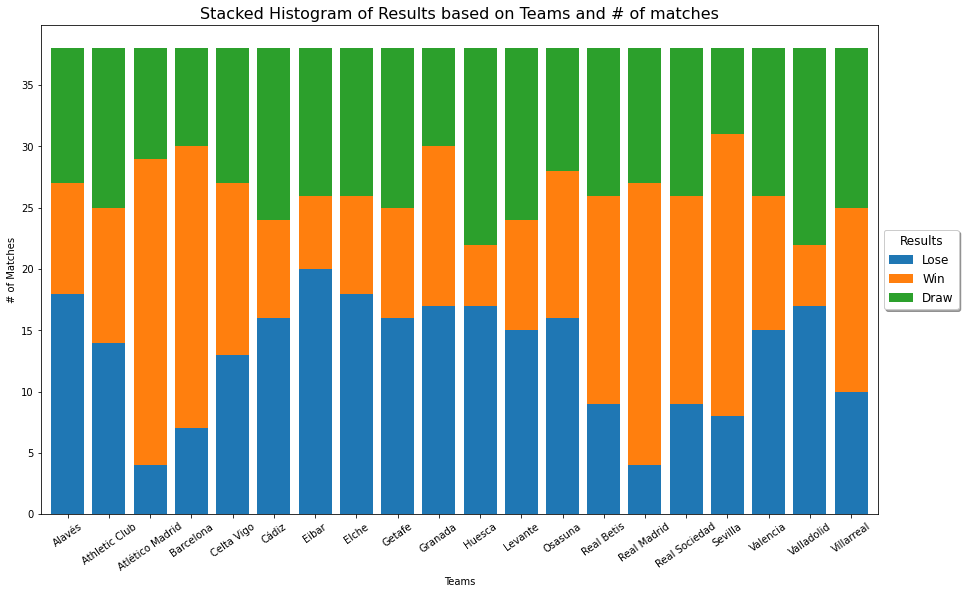

In [20]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


In [21]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Alavés': 1,
 'Athletic Club': 2,
 'Villarreal': 3,
 'Sevilla': 4,
 'Real Sociedad': 5,
 'Valencia': 6,
 'Barcelona': 7,
 'Eibar': 8,
 'Levante': 9,
 'Real Madrid': 10,
 'Atlético Madrid': 11,
 'Real Betis': 12,
 'Osasuna': 13,
 'Valladolid': 14,
 'Celta Vigo': 15,
 'Elche': 16,
 'Huesca': 17,
 'Granada': 18,
 'Getafe': 19,
 'Cádiz': 20}

In [22]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1,1
1,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,11,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1,0
4,Alavés_vs_Barcelona,2020-10-31,1,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2,1


In [23]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

# Data Processing : 

In [24]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [25]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Opponent_Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)


In [26]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks",'Potential','Overall Rating','Value','Age_y'])


In [27]:
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,11,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
4,Alavés_vs_Barcelona,2020-10-31,1,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2,1,1.333333,0.714286,...,17.333333,16.571429,75.625000,75.672052,73.577381,73.239229,27.773810,27.356293,5.222619e+06,5.460282e+06


Compute the difference of scores between teams playing : 

In [28]:
df_versus = df_versus.sort_values(by=['Match','Date'])
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,11,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
4,Alavés_vs_Barcelona,2020-10-31,1,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2,1,1.333333,0.714286,...,17.333333,16.571429,75.625000,75.672052,73.577381,73.239229,27.773810,27.356293,5.222619e+06,5.460282e+06


In [29]:
df_home = df_versus[df_versus['Home/Away']==1].reset_index(drop=True)
df_away = df_versus[df_versus['Home/Away']==0].reset_index(drop=True)

In [30]:
df_home.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
2,Alavés_vs_Barcelona,2020-10-31,1,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2,1,1.333333,0.714286,...,17.333333,16.571429,75.625000,75.672052,73.577381,73.239229,27.773810,27.356293,5.222619e+06,5.460282e+06


In [31]:
df_away.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,11,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
2,Alavés_vs_Barcelona,2020-10-31,7,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2,0,1.666667,1.400000,...,17.666667,16.600000,86.222222,86.326667,80.888889,81.073333,25.055556,25.206667,2.875000e+07,2.946000e+07


In [32]:
df_away_tags = df_away[['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results']]
df_home_tags = df_home[['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results']]
df_away_scores = df_away.drop(columns=['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results'])
df_home_scores = df_home.drop(columns=['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results'])

In [33]:
df_home_scores.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.666667,0.500000,0.333333,0.250000,0.000000,0.0000,0.000000,0.000000,6.333333,7.0000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,1.666667,0.875000,1.000000,0.500000,0.333333,0.1875,0.666667,0.250000,10.000000,8.5625,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
2,1.333333,0.714286,1.000000,0.571429,0.000000,0.0000,0.333333,0.142857,8.666667,9.0000,...,17.333333,16.571429,75.625000,75.672052,73.577381,73.239229,27.773810,27.356293,5.222619e+06,5.460282e+06


In [34]:
df_away_scores.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,10.333333,10.333333,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
1,0.666667,1.857143,0.666667,1.500000,0.000000,0.142857,0.000000,0.285714,9.000000,11.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
2,1.666667,1.400000,1.000000,0.800000,0.333333,0.200000,0.333333,0.200000,10.000000,10.200000,...,17.666667,16.600000,86.222222,86.326667,80.888889,81.073333,25.055556,25.206667,2.875000e+07,2.946000e+07


In [35]:
df_away_scores_subs = df_away_scores - df_home_scores
df_away_scores_subs.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.000000,0.166667,0.333333,0.416667,0.000000,0.000000,0.000000,0.000000,4.000000,3.333333,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,-1.000000,0.982143,-0.333333,1.000000,-0.333333,-0.044643,-0.666667,0.035714,-1.000000,3.294643,...,-2.000000,0.017857,10.465476,10.241893,8.684524,9.254649,-3.135714,-1.878330,3.972341e+07,4.005438e+07
2,0.333333,0.685714,0.000000,0.228571,0.333333,0.200000,0.000000,0.057143,1.333333,1.200000,...,0.333333,0.028571,10.597222,10.654615,7.311508,7.834104,-2.718254,-2.149626,2.352738e+07,2.399972e+07


In [36]:
df_home_scores_subs = df_home_scores - df_away_scores
df_home_scores_subs.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.000000,-0.166667,-0.333333,-0.416667,0.000000,0.000000,0.000000,0.000000,-4.000000,-3.333333,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
1,1.000000,-0.982143,0.333333,-1.000000,0.333333,0.044643,0.666667,-0.035714,1.000000,-3.294643,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07
2,-0.333333,-0.685714,0.000000,-0.228571,-0.333333,-0.200000,0.000000,-0.057143,-1.333333,-1.200000,...,-0.333333,-0.028571,-10.597222,-10.654615,-7.311508,-7.834104,2.718254,2.149626,-2.352738e+07,-2.399972e+07


In [37]:
df_final_away = pd.concat([df_away_tags,df_away_scores_subs], axis=1, sort=False)
df_final_away.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,0,0.000000,0.166667,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,11,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,1,-1.000000,0.982143,...,-2.000000,0.017857,10.465476,10.241893,8.684524,9.254649,-3.135714,-1.878330,3.972341e+07,4.005438e+07
2,Alavés_vs_Barcelona,2020-10-31,7,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,2,0.333333,0.685714,...,0.333333,0.028571,10.597222,10.654615,7.311508,7.834104,-2.718254,-2.149626,2.352738e+07,2.399972e+07


In [38]:
df_final_home = pd.concat([df_home_tags,df_home_scores_subs], axis=1, sort=False)
df_final_home.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,1,0.000000,-0.166667,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,0,1.000000,-0.982143,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07
2,Alavés_vs_Barcelona,2020-10-31,1,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,2,-0.333333,-0.685714,...,-0.333333,-0.028571,-10.597222,-10.654615,-7.311508,-7.834104,2.718254,2.149626,-2.352738e+07,-2.399972e+07


In [39]:
df_final = df_final_home.append(df_final_away)
df_final = df_final.sort_values(by=['Match','Date'])
df_final.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,1,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,1,0.0,-0.166667,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
0,Alavés_vs_Athletic_Club,2020-10-04,2,1,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0,0,0.0,0.166667,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,1,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1,0,1.0,-0.982143,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07


In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 379
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Match                       760 non-null    object 
 1   Date                        760 non-null    object 
 2   Team                        760 non-null    int64  
 3   Opponent_Team               760 non-null    int64  
 4   Stadium                     760 non-null    object 
 5   Crowd                       760 non-null    float64
 6   Home/Away                   760 non-null    int64  
 7   Results                     760 non-null    int64  
 8   last_3_avrg_Gls             734 non-null    float64
 9   avrg_Gls                    734 non-null    float64
 10  last_3_avrg_Ast             734 non-null    float64
 11  avrg_Ast                    734 non-null    float64
 12  last_3_avrg_PK              734 non-null    float64
 13  avrg_PK                     734 non

In [41]:
df_final.to_csv('finalData20-21.csv')

# Testing different Models : 

In [45]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [101]:
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [46]:
clf_logistic = LogisticRegression()

acc_logistic = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

   


print("Logistic Regression : ",np.array(acc_logistic).mean())



Logistic Regression :  0.46885526315789466


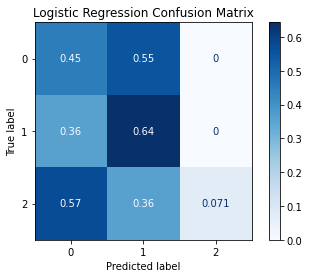

In [49]:
ConfusionMatrixDisplay.from_estimator(
        clf_logistic,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [50]:
clf_svm = svm.SVC()

acc_svm = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
   

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("SVM : ", np.array(acc_svm).mean())


SVM :  0.46246710526315793


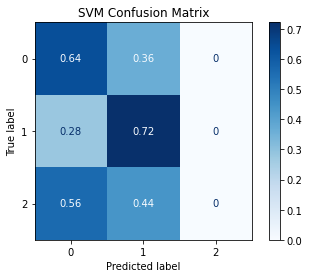

In [51]:
ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('SVM Confusion Matrix')
plt.show()

In [52]:
clf_KNN = KNeighborsClassifier()

acc_KNN = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 


print("KNN : ",np.array(acc_KNN).mean())



KNN :  0.449578947368421


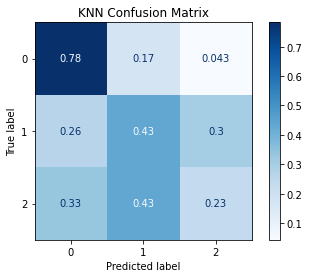

In [53]:
ConfusionMatrixDisplay.from_estimator(
        clf_KNN,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('KNN Confusion Matrix')
plt.show()

In [54]:
clf_random = RandomForestClassifier()

acc_random = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

print("Random Forest : ", np.array(acc_random).mean())



Random Forest :  0.45925657894736843


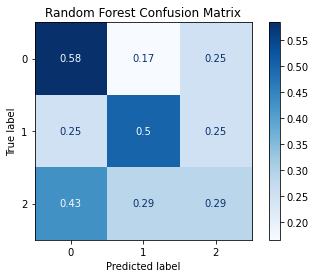

In [56]:
ConfusionMatrixDisplay.from_estimator(
        clf_random,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Random Forest Confusion Matrix')
plt.show()

In [57]:
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
clf_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
acc_logistic_lasso = []
# In the first step we will split the data in training and remaining dataset
X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

# We split the remaining dataset between valid and test dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)

clf_logistic_lasso.fit(X_train, Y_train)
y_hat_logistic_lasso = clf_logistic_lasso.predict(X_test)
acc_logistic_lasso.append(accuracy_score(y_test,y_hat_logistic_lasso))

print("Logistic Regression with Lasso regularization : ",np.array(acc_logistic_lasso).mean())

Logistic Regression with Lasso regularization :  0.5131578947368421


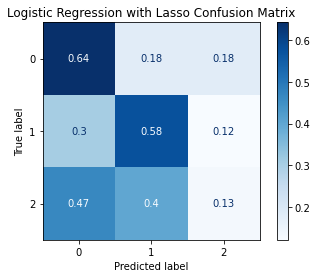

In [58]:
ConfusionMatrixDisplay.from_estimator(
        clf_logistic_lasso,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Logistic Regression with Lasso Confusion Matrix')
plt.show()

# Feature Engineering : 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold



 Clf result : 0.467, +/- 0.061 N_features : 1
 Clf result : 0.465, +/- 0.058 N_features : 2
 Clf result : 0.492, +/- 0.061 N_features : 3
 Clf result : 0.482, +/- 0.056 N_features : 4
 Clf result : 0.495, +/- 0.065 N_features : 5
 Clf result : 0.495, +/- 0.065 N_features : 6
 Clf result : 0.474, +/- 0.063 N_features : 7
 Clf result : 0.492, +/- 0.053 N_features : 8
 Clf result : 0.482, +/- 0.062 N_features : 9
 Clf result : 0.477, +/- 0.051 N_features : 10
 Clf result : 0.482, +/- 0.043 N_features : 11
 Clf result : 0.482, +/- 0.049 N_features : 12
 Clf result : 0.475, +/- 0.045 N_features : 13
 Clf result : 0.474, +/- 0.047 N_features : 14
 Clf result : 0.489, +/- 0.054 N_features : 15
 Clf result : 0.489, +/- 0.064 N_features : 16
 Clf result : 0.488, +/- 0.061 N_features : 17
 Clf result : 0.485, +/- 0.055 N_features : 18
 Clf result : 0.487, +/- 0.058 N_features : 19
 Clf result : 0.492, +/- 0.056 N_features : 20
 Clf result : 0.487, +/- 0.061 N_features : 21
 Clf result : 0.479, +

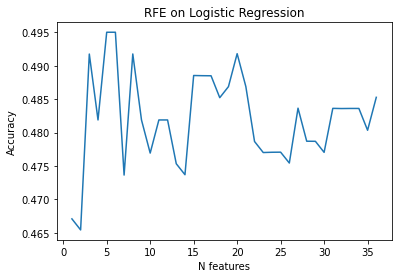

In [102]:
acc_results = []
n_features = []

clf_logistic = LogisticRegression()

#Implementing recursive feature elimination on LR
for i in range(1, len(X.columns)):
    rfe = RFE(estimator = clf_logistic, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)
    scaler = MinMaxScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf_logistic, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.title('RFE on Logistic Regression')
plt.show()

In [103]:
#Obtaining the best 6 features for the LogReg model
rfe = RFE(estimator = clf_logistic, n_features_to_select = 6, step=1)
rfe.fit(X, Y)
X_transformed = rfe.transform(X)

np.random.seed(2022)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size = 0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#getting column names
featured_columns = pd.DataFrame(rfe.support_,index = X.columns, columns=['is_in'])

featured_columns_log = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns_log

['last_3_avrg_Touches',
 'avrg_Touches',
 'last_3_avrg_Press',
 'avrg_Press',
 'last_3_avrg_Value',
 'avrg_Value']

 Clf result : 0.451, +/- 0.027 N_features : 5
 Clf result : 0.474, +/- 0.028 N_features : 6
 Clf result : 0.480, +/- 0.034 N_features : 7
 Clf result : 0.492, +/- 0.028 N_features : 8
 Clf result : 0.452, +/- 0.025 N_features : 9
 Clf result : 0.454, +/- 0.045 N_features : 10
 Clf result : 0.465, +/- 0.015 N_features : 11
 Clf result : 0.451, +/- 0.047 N_features : 12
 Clf result : 0.477, +/- 0.031 N_features : 13
 Clf result : 0.467, +/- 0.017 N_features : 14
 Clf result : 0.475, +/- 0.014 N_features : 15
 Clf result : 0.472, +/- 0.029 N_features : 16
 Clf result : 0.472, +/- 0.037 N_features : 17
 Clf result : 0.469, +/- 0.019 N_features : 18
 Clf result : 0.459, +/- 0.042 N_features : 19
 Clf result : 0.488, +/- 0.030 N_features : 20
 Clf result : 0.487, +/- 0.043 N_features : 21
 Clf result : 0.479, +/- 0.028 N_features : 22
 Clf result : 0.467, +/- 0.028 N_features : 23
 Clf result : 0.472, +/- 0.052 N_features : 24
 Clf result : 0.470, +/- 0.026 N_features : 25
 Clf result : 0.46

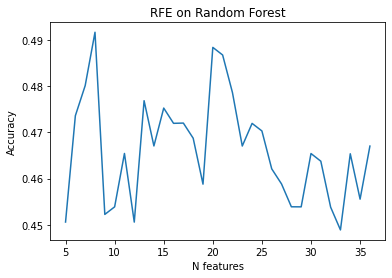

In [83]:
acc_results = []
n_features = []

#Selecting Random Forest
clf_random = RandomForestClassifier()
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#Implementing recursive feature elimination on RF
for i in range(5, len(X.columns)):
    rfe = RFE(estimator = clf_random, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf_random, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.title('RFE on Random Forest')
plt.show()

In [84]:
#Obtaining the best 8 features for the Random Forest Model 
rfe = RFE(estimator = clf_random, n_features_to_select = 8, step=1)
rfe.fit(X, Y)
X_transformed = rfe.transform(X)

np.random.seed(2022)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size = 0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#getting column names
featured_columns = pd.DataFrame(rfe.support_,index = X.columns, columns=['is_in'])

featured_columns_RF = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns_RF

['avrg_Ast',
 'avrg_Sh',
 'last_3_avrg_Touches',
 'avrg_Touches',
 'avrg_Tkl',
 'avrg_Blocks',
 'last_3_avrg_Value',
 'avrg_Value']

In [ ]:
#feature engineering SVM 
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, train_size=0.80)

clf_svm = svm.SVC()
clf_svm.fit(X_train, Y_train)

y_pred = clf_svm.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("F-1 Score:", metrics.f1_score(Y_test, y_pred, average=None))


# Testing Models with the selected features of the data for each model: 

## General Testing Accuracy

In [ ]:
clf_logistic = LogisticRegression()


X = df_final[featured_columns_log]
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

acc_logistic = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    
    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

      

print("Logistic Regression : ",np.array(acc_logistic).mean())


Logistic Regression :  0.46807894736842104


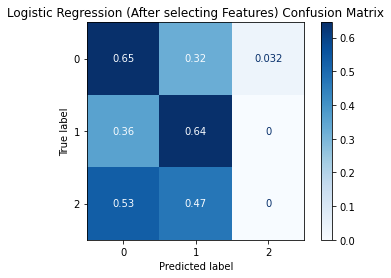

In [68]:
ConfusionMatrixDisplay.from_estimator(
        clf_logistic,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Logistic Regression (After selecting Features) Confusion Matrix')
plt.show()

In [99]:
clf_random = RandomForestClassifier()


X = df_final[featured_columns_RF]
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

acc_random = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random))

      

print("Random Forest : ",np.array(acc_random).mean())


Random Forest :  0.4711118421052632


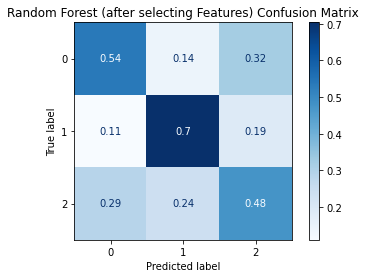

In [ ]:
ConfusionMatrixDisplay.from_estimator(
        clf_random,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Random Forest (after selecting Features)')
plt.show()

In [ ]:
# testing with SVM with selected features 

In [97]:
X = df_final[featured_columns_RF]
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
clf_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
acc_logistic_lasso = []
# In the first step we will split the data in training and remaining dataset
X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

# We split the remaining dataset between valid and test dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)

clf_logistic_lasso.fit(X_train, Y_train)
y_hat_logistic_lasso = clf_logistic_lasso.predict(X_test)
acc_logistic_lasso.append(accuracy_score(y_test,y_hat_logistic_lasso))

print("Logistic Regression with Lasso regularization After RFE: ",np.array(acc_logistic_lasso).mean())

Logistic Regression with Lasso regularization After RFE:  0.5


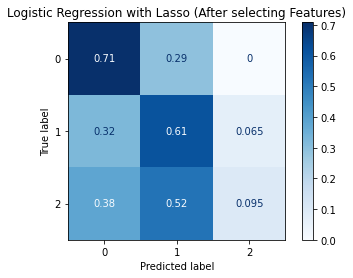

In [98]:
ConfusionMatrixDisplay.from_estimator(
        clf_logistic_lasso,
        X_test,
        y_test,
        display_labels=[0,1,2],
        cmap=plt.cm.Blues,
        normalize='true',
    )
plt.title('Logistic Regression with Lasso (After selecting Features)')
plt.show()

## Testing Accuracy of Real Madrid matches 

In [73]:
# Real Madrid matches' prediction with Random Forest : 
clf_random = RandomForestClassifier()
acc_random_real = []
# get the real madrid index :
real_index = team_index['Real Madrid']

real = df_final[df_final["Team"]==real_index]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real[featured_columns_RF]
Y_real = real['Results']

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)
    
    clf_random.fit(X_train_real, Y_train_real)
    y_hat_random_real = clf_random.predict(X_test_real)
    acc_random_real.append(accuracy_score(y_test_real,y_hat_random_real))

print("Prediction of Random Forest of Real Madrid matches :",np.array(acc_random_real).mean())



Prediction of Random Forst of Real Madrid matches : 0.545875


In [74]:
# Real Madrid matches' prediction with Logistic Regression : 
clf_logistic = LogisticRegression()
acc_log_real = []
# get the real madrid index :
real_index = team_index['Real Madrid']

real = df_final[df_final["Team"]==real_index]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real[featured_columns_log]
Y_real = real['Results']

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)
    
    clf_logistic.fit(X_train_real, Y_train_real)
    y_hat_logistic_real = clf_logistic.predict(X_test_real)
    acc_log_real.append(accuracy_score(y_test_real,y_hat_logistic_real))

print("Prediction of Logistic Regression of Real Madrid matches :",np.array(acc_log_real).mean())



Prediction of Logistic Regression of Real Madrid matches : 0.55125


In [92]:
# Real Madrid matches' prediction with Logistic Regression : 
clf_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
acc_log_lasso_real = []
# get the real madrid index :
real_index = team_index['Real Madrid']

real = df_final[df_final["Team"]==real_index]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real[featured_columns_log]
Y_real = real['Results']

# In the first step we will split the data in training and remaining dataset
X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

# We split the remaining dataset between valid and test dataset
X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)

clf_logistic_lasso.fit(X_train_real, Y_train_real)
y_hat_logistic_lasso_real = clf_logistic_lasso.predict(X_test_real)
acc_log_lasso_real.append(accuracy_score(y_test_real,y_hat_logistic_lasso_real))

print("Prediction of Logistic Regression with Lasso after RFE of Real Madrid matches :",np.array(acc_log_lasso_real).mean())


Prediction of Logistic Regression with Lasso after RFE of Real Madrid matches : 0.75


In [95]:
# Real Madrid matches' prediction with Logistic Regression : 
clf_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
acc_log_lasso_real = []
# get the real madrid index :
real_index = team_index['Real Madrid']

real = df_final[df_final["Team"]==real_index]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real.drop(columns=['Date','Match','Results','Stadium','Crowd'])

Y_real = real['Results']

# In the first step we will split the data in training and remaining dataset
X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

# We split the remaining dataset between valid and test dataset
X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)

clf_logistic_lasso.fit(X_train_real, Y_train_real)
y_hat_logistic_lasso_real = clf_logistic_lasso.predict(X_test_real)
acc_log_lasso_real.append(accuracy_score(y_test_real,y_hat_logistic_lasso_real))

print("Prediction of Logistic Regression with Lasso of Real Madrid matches :",np.array(acc_log_lasso_real).mean())


Prediction of Logistic Regression with Lasso of Real Madrid matches : 0.75


### Knowing Eibar's stats and Real Madrid's stats, what is the accuracy of the predicted result of their match ?

In [75]:
# DATA FOR RANDOM FOREST 

# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
eibar_index = team_index['Eibar']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_eibar = df_final[df_final["Team"]==eibar_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_eibar = X_eibar.drop(X_eibar[X_eibar['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_eibar = X_eibar.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_eibar = X_eibar['Results']
X_real = X_real[featured_columns_RF]
X_eibar = X_eibar[featured_columns_RF]

X_real_eibar = X_real.append(X_eibar)
Y_real_eibar = Y_real.append(Y_eibar)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Eibar"]
X_real_eibar_test = test[featured_columns_RF]
Y_real_eibar_test = test[['Results']]

In [76]:
clf_random = RandomForestClassifier()
clf_random.fit(X_real_eibar, Y_real_eibar)
y_hat_random_real_eibar = clf_random.predict(X_real_eibar_test)
testing_score = accuracy_score(Y_real_eibar_test,y_hat_random_real_eibar)
print("Accuracy of Random Forst on the Match Real Madrid vs Eibar knowing previous matches of both teams:", testing_score)

Accuracy of Random Forst on the Match Real Madrid vs Eibar knowing previous matches of both teams: 1.0


In [77]:
# DATA FOR Logistic Regression

# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
eibar_index = team_index['Eibar']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_eibar = df_final[df_final["Team"]==eibar_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_eibar = X_eibar.drop(X_eibar[X_eibar['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_eibar = X_eibar.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_eibar = X_eibar['Results']
X_real = X_real[featured_columns_log]
X_eibar = X_eibar[featured_columns_log]

X_real_eibar = X_real.append(X_eibar)
Y_real_eibar = Y_real.append(Y_eibar)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Eibar"]
X_real_eibar_test = test[featured_columns_log]
Y_real_eibar_test = test[['Results']]

In [78]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_real_eibar, Y_real_eibar)
y_hat_random_real_eibar = clf_logistic.predict(X_real_eibar_test)
testing_score = accuracy_score(Y_real_eibar_test,y_hat_random_real_eibar)
print("Accuracy of Logistic Regression on the Match Real Madrid vs Eibar knowing previous matches of both teams:", testing_score)

Accuracy of Logistic Regression on the Match Real Madrid vs Eibar knowing previous matches of both teams: 1.0


### Knowing Atletico Madrid's stats and Real Madrid's stats, what is the accuracy of the predicted result of their match ?

In [79]:
# Data For Random Forest : 
# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
atletico_index = team_index['Atlético Madrid']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_atletico = df_final[df_final["Team"]==atletico_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_atletico = X_atletico.drop(X_atletico[X_atletico['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_atletico = X_atletico.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_atletico = X_atletico['Results']
X_real = X_real[featured_columns_RF]
X_atletico = X_atletico[featured_columns_RF]

X_real_atletico = X_real.append(X_atletico)
Y_real_atletico = Y_real.append(Y_atletico)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Atlético_Madrid"]
X_real_atletico_test = test[featured_columns_RF]
Y_real_atletico_test = test[['Results']]

In [80]:
clf_random = RandomForestClassifier()
clf_random.fit(X_real_atletico, Y_real_atletico)
y_hat_random_real_atletico = clf_random.predict(X_real_atletico_test)
testing_score = accuracy_score(Y_real_atletico_test,y_hat_random_real_atletico)
print("Accuracy of Random Forst on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams:", testing_score)

Accuracy of Random Forst on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams: 1.0


In [81]:
# Data For Logistic Regression : 
# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
atletico_index = team_index['Atlético Madrid']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_atletico = df_final[df_final["Team"]==atletico_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_atletico = X_atletico.drop(X_atletico[X_atletico['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_atletico = X_atletico.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_atletico = X_atletico['Results']
X_real = X_real[featured_columns_log]
X_atletico = X_atletico[featured_columns_log]

X_real_atletico = X_real.append(X_atletico)
Y_real_atletico = Y_real.append(Y_atletico)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Atlético_Madrid"]
X_real_atletico_test = test[featured_columns_log]
Y_real_atletico_test = test[['Results']]

In [82]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_real_atletico, Y_real_atletico)
y_hat_random_real_atletico = clf_logistic.predict(X_real_atletico_test)
testing_score = accuracy_score(Y_real_atletico_test,y_hat_random_real_atletico)
print("Accuracy of Logistic Regression on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams:", testing_score)

Accuracy of Logistic Regression on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams: 0.5
